# Stress Level - KS Test

Source: https://www.kaggle.com/datasets/laavanya/stress-level-detection

In [1]:
#Import libraries
import pandas as pd

“Humidity – Temperature – Step count – Stress levels” represents the titles for Stress-Lysis.csv file. 

Based on the human’s physical activity, the stress levels of the human being are detected and analyzed here. A dataset of 2001 samples is provided for human body humidity, body temperature and the number of steps taken by the user. Three different classifications of stress are performed, low stress, normal stress, and high stress. More information on how this data is analyzed can be found at “L. Rachakonda, S. P. Mohanty, E. Kougianos, and P. Sundaravadivel, “Stress-Lysis: A DNN-Integrated Edge Device for Stress Level Detection in the IoMT,” IEEE Trans. Conum. Electron., vol. 65, no. 4, pp. 474–483, 2019.” 


References:

1.	L. Rachakonda, S. P. Mohanty, E. Kougianos, and P. Sundaravadivel, “Stress-Lysis: A DNN-Integrated Edge Device for Stress Level Detection in the IoMT,” IEEE Trans. Conum. Electron., vol. 65, no. 4, pp. 474–483, 2019.
2.	L. Rachakonda, P. Sundaravadivel, S. P. Mohanty, E. Kougianos, and M. Ganapathiraju, “A Smart Sensor in the IoMT for Stress Level Detection”, in Proceedings of the 4th IEEE International Symposium on Smart Electronic Systems (iSES), 2018, pp. 141--145.


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skewnorm

In [3]:
#Read the data
data = pd.read_csv('Stress-Lysis.csv')

In [4]:
data.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [5]:
#Replace Stress Level values
data['Stress Level'] = data['Stress Level'].map({0:'Low',1:'Normal',2:'High'})
data.sort_values(by=['Stress Level'])
data.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,Normal
1,21.41,90.41,93,Normal
2,27.12,96.12,196,High
3,27.64,96.64,177,High
4,10.87,79.87,87,Low


In [6]:
#Data set size (lines,columns)
data.shape

(2001, 4)

In [7]:
#Analyze data points
data['Stress Level'].value_counts(ascending=True)

Low       501
High      710
Normal    790
Name: Stress Level, dtype: int64

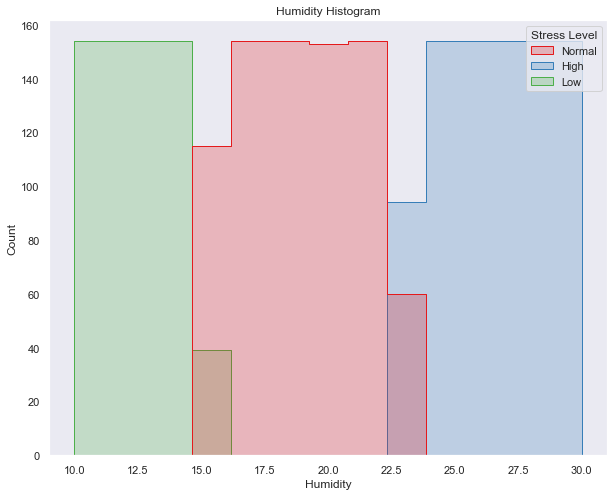

In [8]:
#Histogram Humidity
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('dark')
ax = sns.histplot(data=data,x='Humidity',hue='Stress Level',element='step',palette='Set1').set_title('Humidity Histogram')
ax;

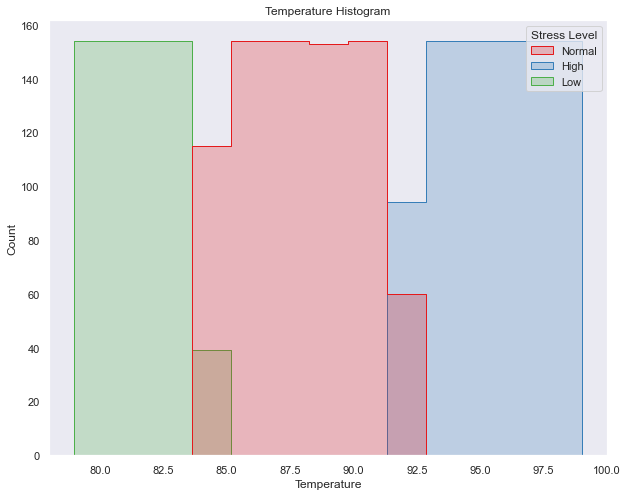

In [9]:
#Histogram Temperature
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('dark')
ax = sns.histplot(data=data,x='Temperature',hue='Stress Level',element='step',palette='Set1').set_title('Temperature Histogram')
ax;

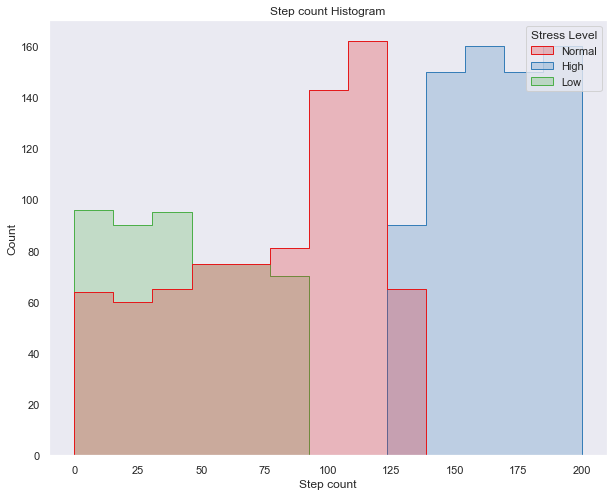

In [10]:
#Histogram Step count
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('dark')
ax = sns.histplot(data=data,x='Step count',hue='Stress Level',element='step',palette='Set1').set_title('Step count Histogram')
ax;

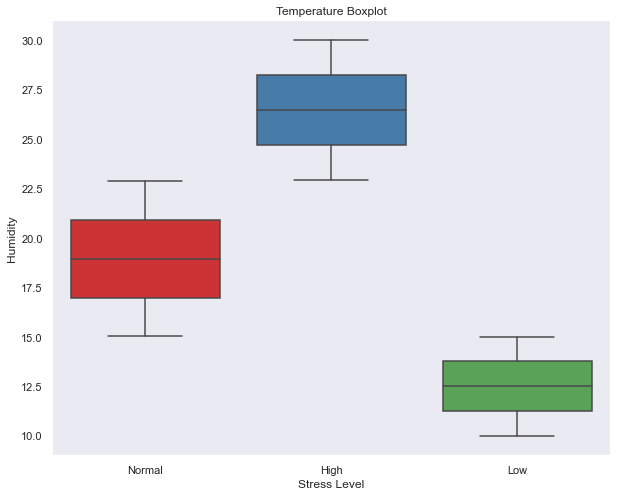

In [11]:
#Boxplot Humidity
sns.set_style('dark')
ax = sns.boxplot(x='Stress Level',y='Humidity',data=data,palette='Set1').set_title('Temperature Boxplot')
ax;

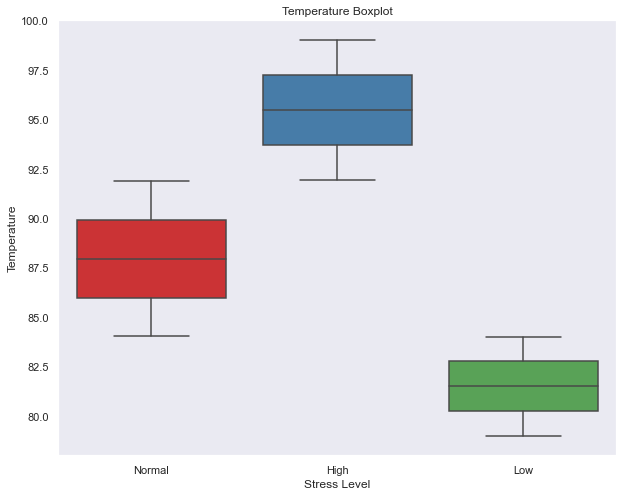

In [12]:
#Boxplot Temperature
sns.set_style('dark')
ax = sns.boxplot(x='Stress Level',y='Temperature',data=data,palette='Set1').set_title('Temperature Boxplot')
ax;

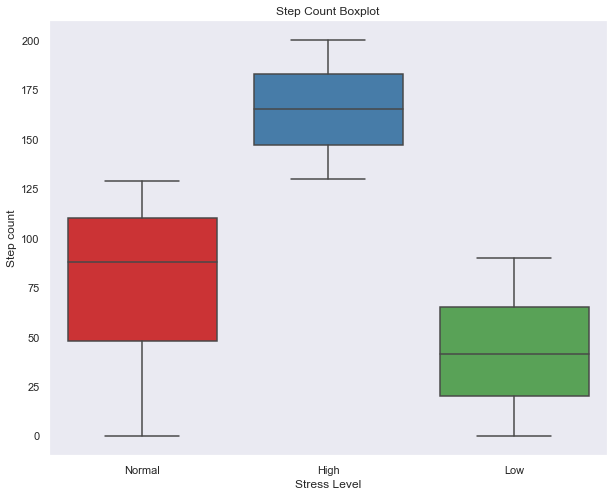

In [13]:
#Boxplot Step Count
sns.set_style('dark')
ax = sns.boxplot(x='Stress Level',y='Step count',data=data,palette='Set1').set_title('Step Count Boxplot')
ax;

### KS Test

KS Statistics compares the two cumulative distributions and returns the maximum difference between them
It's a non-parametric test (i.e. it don't need to test any assumption related to the distribution of the data)

In this test, Null Hypotesis states both cumulative distributions are similar
Rejecting the null hypothesis means cumulative distributions are different

In [14]:
#KS - High and Normal Stress Level
from scipy.stats import ks_2samp

In [24]:
#Series for Temperature of the Stress levels
normal_level_temp = data.loc[data['Stress Level']=='Normal']['Temperature']
high_level_temp = data.loc[data['Stress Level']=='High']['Temperature']
low_level_temp = data.loc[data['Stress Level'] == 'Low']['Temperature']

In [26]:
#Test Normal and High Level
ks_2samp(normal_level_temp,high_level_temp)

KstestResult(statistic=1.0, pvalue=3.3306690738754696e-16)

In [27]:
ks_2samp(normal_level_temp,high_level_temp)[1] > 0.05

False

As the p-value is lower than 0.05, the distributions are different

In [28]:
#Test High and Low level
ks_2samp(low_level_temp,high_level_temp)

KstestResult(statistic=1.0, pvalue=0.0)

As the p-value is lower than 0.05, the distributions are different

In [29]:
##Series for Humidity of the Stress levels
normal_level_hum = data.loc[data['Stress Level']=='Normal']['Humidity']
high_level_hum = data.loc[data['Stress Level']=='High']['Humidity']
low_level_hum = data.loc[data['Stress Level'] == 'Low']['Humidity']

In [30]:
#Test Normal and High Level
ks_2samp(normal_level_hum,high_level_hum)

KstestResult(statistic=1.0, pvalue=3.3306690738754696e-16)

It returned the same results as the test with the temperature

In [31]:
#Test High and Low level
ks_2samp(low_level_hum,high_level_hum)

KstestResult(statistic=1.0, pvalue=0.0)

It returned the same results as the test with the temperature